In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

Random Forest Analysis

Number of columns: 78
OOB error rate: 6.25%


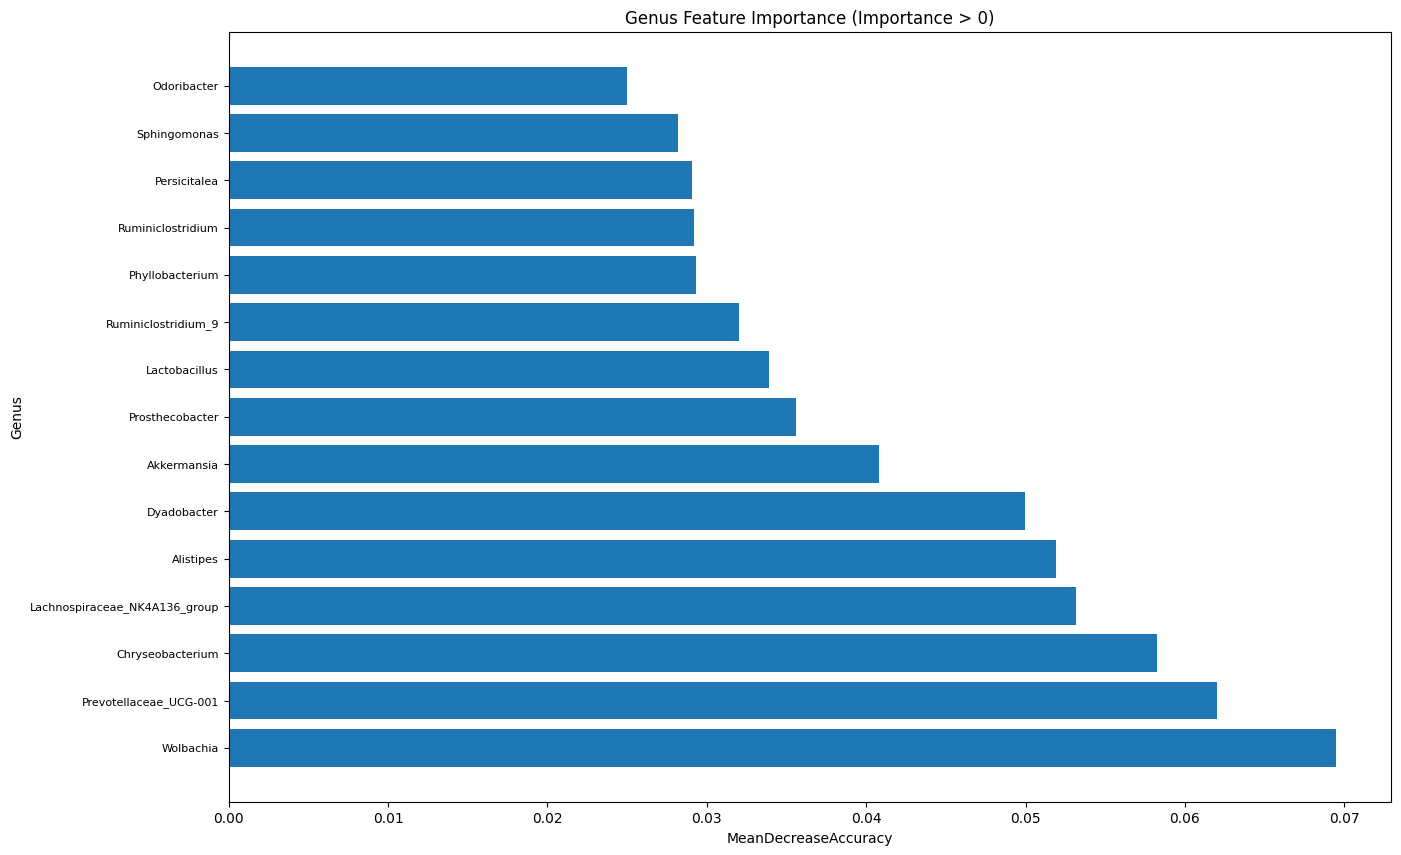

In [163]:
data = pd.read_csv('genus_table_Umar_MPD.csv')
metadata = pd.read_csv('P8_C_F.csv')

# Convert columns to numeric
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric)
# Low count filter
minimum_count = 4
prevalence_threshold = 0.2
# Filter features based on minimum count and prevalence threshold
filtered_data = data[data.iloc[:, 1:].ge(minimum_count).sum(axis=1) / data.shape[1] >= prevalence_threshold]
# Low variance filter
variance_cutoff = 0.1
# Filter features based on variance
data = filtered_data[filtered_data.iloc[:, 1:].var(axis=1) >= variance_cutoff]
# Select the numeric columns to normalize
numeric_columns = data.columns[1:]
scaler = MinMaxScaler()
# Normalize the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
otu_data_transposed = data.transpose()
new_column_names = otu_data_transposed.iloc[0]
otu_data_transposed = otu_data_transposed[1:]
otu_data_transposed.columns = new_column_names
# Reset the index and rename the index column
otu_data_transposed = otu_data_transposed.reset_index()
otu_data_transposed = otu_data_transposed.rename(columns={'index': '#NAME'})
otu_data_transposed['#NAME'] = otu_data_transposed['#NAME'].astype(str)
metadata['#NAME'] = metadata['#NAME'].astype(str)
merged_data = pd.merge(otu_data_transposed, metadata, on='#NAME')
new_columns = merged_data.columns.str.split(';').str[-1]
merged_data.columns = new_columns
merged_data = merged_data.drop(columns=['NA'])
# print(merged_data)
X = merged_data.drop('Experiment', axis=1)  # Replace 'target_variable' with the column name of your target variable
num_columns = X.shape[1]
print("Number of columns:", num_columns)
# print(X)
y = merged_data['Experiment']  # Replace 'target_variable' with the column name of your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=500,oob_score=True,random_state=42)
# Train the classifier on the training data
pre = rf.fit(X, y)
# Compute the OOB score (error rate)
oob_error_rate = 1 - rf.oob_score_
print(f"OOB error rate: {oob_error_rate:.2%}")

# Calculate the feature importances (mean decrease accuracy)
feature_importances = rf.feature_importances_
# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df = importance_df.loc[importance_df['Importance'] > 0]
importance_df = importance_df.head(15)
# print(importance_df)
# Plot a horizontal bar chart
plt.figure(figsize=(15, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('MeanDecreaseAccuracy')
plt.ylabel('Genus')
plt.title('Genus Feature Importance (Importance > 0)')
plt.yticks(fontsize=8)
# Show the plot
plt.show()


In [164]:
merged_data.head(10)

,#NAME,Lactobacillus,Escherichia/Shigella,Muribacter,Staphylococcus,Streptococcus,Enterococcus,Pseudomonas,Lachnospiraceae_NK4A136_group,Bacteroides,...,Rikenella,C39,Stenotrophomonas,Helicobacter,Shinella,Aminobacter,Coxiella,Stakelama,Novispirillum,Experiment
0,1,1.0,0.001417,0.018184,0.021171,0.063614,0.000936,0.0,0.000759,0.000734,...,0.000076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
1,2,1.0,0.001745,0.015539,0.050649,0.067889,0.000293,0.000044,0.001187,0.000968,...,0.0,0.0,0.0,0.000147,0.0,0.0,0.0,0.0,0.0,C
2,3,1.0,0.001151,0.020023,0.041767,0.060665,0.000225,0.000053,0.00139,0.001072,...,0.0,0.000066,0.0,0.000132,0.0,0.0,0.00004,0.0,0.0,C
3,4,0.031415,1.0,0.00091,0.016064,0.0007,0.001469,0.0,0.004912,0.003079,...,0.00021,0.000098,0.000182,0.0,0.000294,0.000182,0.0,0.000266,0.000084,F
4,5,0.093204,1.0,0.038011,0.115261,0.008154,0.000904,0.0,0.004021,0.002987,...,0.0,0.00021,0.0,0.0,0.000355,0.000145,0.000048,0.000226,0.0,F
5,6,0.033639,1.0,0.010665,0.009731,0.003026,0.004595,0.000261,0.013803,0.006089,...,0.0,0.000448,0.00028,0.000187,0.0,0.0,0.0,0.000766,0.0,F
6,7,1.0,0.01673,0.016167,0.000118,0.063205,0.000288,0.0,0.000942,0.000693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000052,C
7,8,1.0,0.000974,0.03134,0.000192,0.085842,0.000236,0.0,0.001107,0.00062,...,0.000074,0.0,0.0,0.000059,0.0,0.0,0.000074,0.0,0.0,C
8,9,0.204022,1.0,0.006959,0.105206,0.00347,0.001509,0.0,0.004038,0.00247,...,0.000529,0.0,0.0,0.000098,0.0,0.0,0.0,0.0,0.0,F
9,10,0.06518,1.0,0.029067,0.126616,0.012175,0.00084,0.000133,0.001887,0.001194,...,0.000044,0.0,0.000044,0.0,0.0,0.0,0.0,0.0,0.0,F


In [166]:
Experiment = merged_data['Experiment'].unique()
merged_data = merged_data.drop(columns=["Experiment"])
y_labels = merged_data['#NAME'].unique()
merged_data = merged_data.drop(columns=["#NAME"])
merged_data = merged_data.astype(float)
merged_data.head(10)

,Lactobacillus,Escherichia/Shigella,Muribacter,Staphylococcus,Streptococcus,Enterococcus,Pseudomonas,Lachnospiraceae_NK4A136_group,Bacteroides,Turicibacter,...,Elizabethkingia,Rikenella,C39,Stenotrophomonas,Helicobacter,Shinella,Aminobacter,Coxiella,Stakelama,Novispirillum
0,1.000000,0.001417,0.018184,0.021171,0.063614,0.000936,0.000000,0.000759,0.000734,0.000000,...,0.000063,0.000076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.001745,0.015539,0.050649,0.067889,0.000293,0.000044,0.001187,0.000968,0.000000,...,0.000059,0.000000,0.000000,0.000000,0.000147,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,0.001151,0.020023,0.041767,0.060665,0.000225,0.000053,0.001390,0.001072,0.000000,...,0.000000,0.000000,0.000066,0.000000,0.000132,0.000000,0.000000,0.000040,0.000000,0.000000
3,0.031415,1.000000,0.000910,0.016064,0.000700,0.001469,0.000000,0.004912,0.003079,0.000140,...,0.000098,0.000210,0.000098,0.000182,0.000000,0.000294,0.000182,0.000000,0.000266,0.000084
4,0.093204,1.000000,0.038011,0.115261,0.008154,0.000904,0.000000,0.004021,0.002987,0.000000,...,0.000129,0.000000,0.000210,0.000000,0.000000,0.000355,0.000145,0.000048,0.000226,0.000000
5,0.033639,1.000000,0.010665,0.009731,0.003026,0.004595,0.000261,0.013803,0.006089,0.000168,...,0.000205,0.000000,0.000448,0.000280,0.000187,0.000000,0.000000,0.000000,0.000766,0.000000
6,1.000000,0.016730,0.016167,0.000118,0.063205,0.000288,0.000000,0.000942,0.000693,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000052
7,1.000000,0.000974,0.031340,0.000192,0.085842,0.000236,0.000000,0.001107,0.000620,0.000000,...,0.000000,0.000074,0.000000,0.000000,0.000059,0.000000,0.000000,0.000074,0.000000,0.000000
8,0.204022,1.000000,0.006959,0.105206,0.003470,0.001509,0.000000,0.004038,0.002470,0.000000,...,0.000098,0.000529,0.000000,0.000000,0.000098,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.065180,1.000000,0.029067,0.126616,0.012175,0.000840,0.000133,0.001887,0.001194,0.000000,...,0.000000,0.000044,0.000000,0.000044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Heatmap

Text(220.72222222222223, 0.5, 'Sample Id')

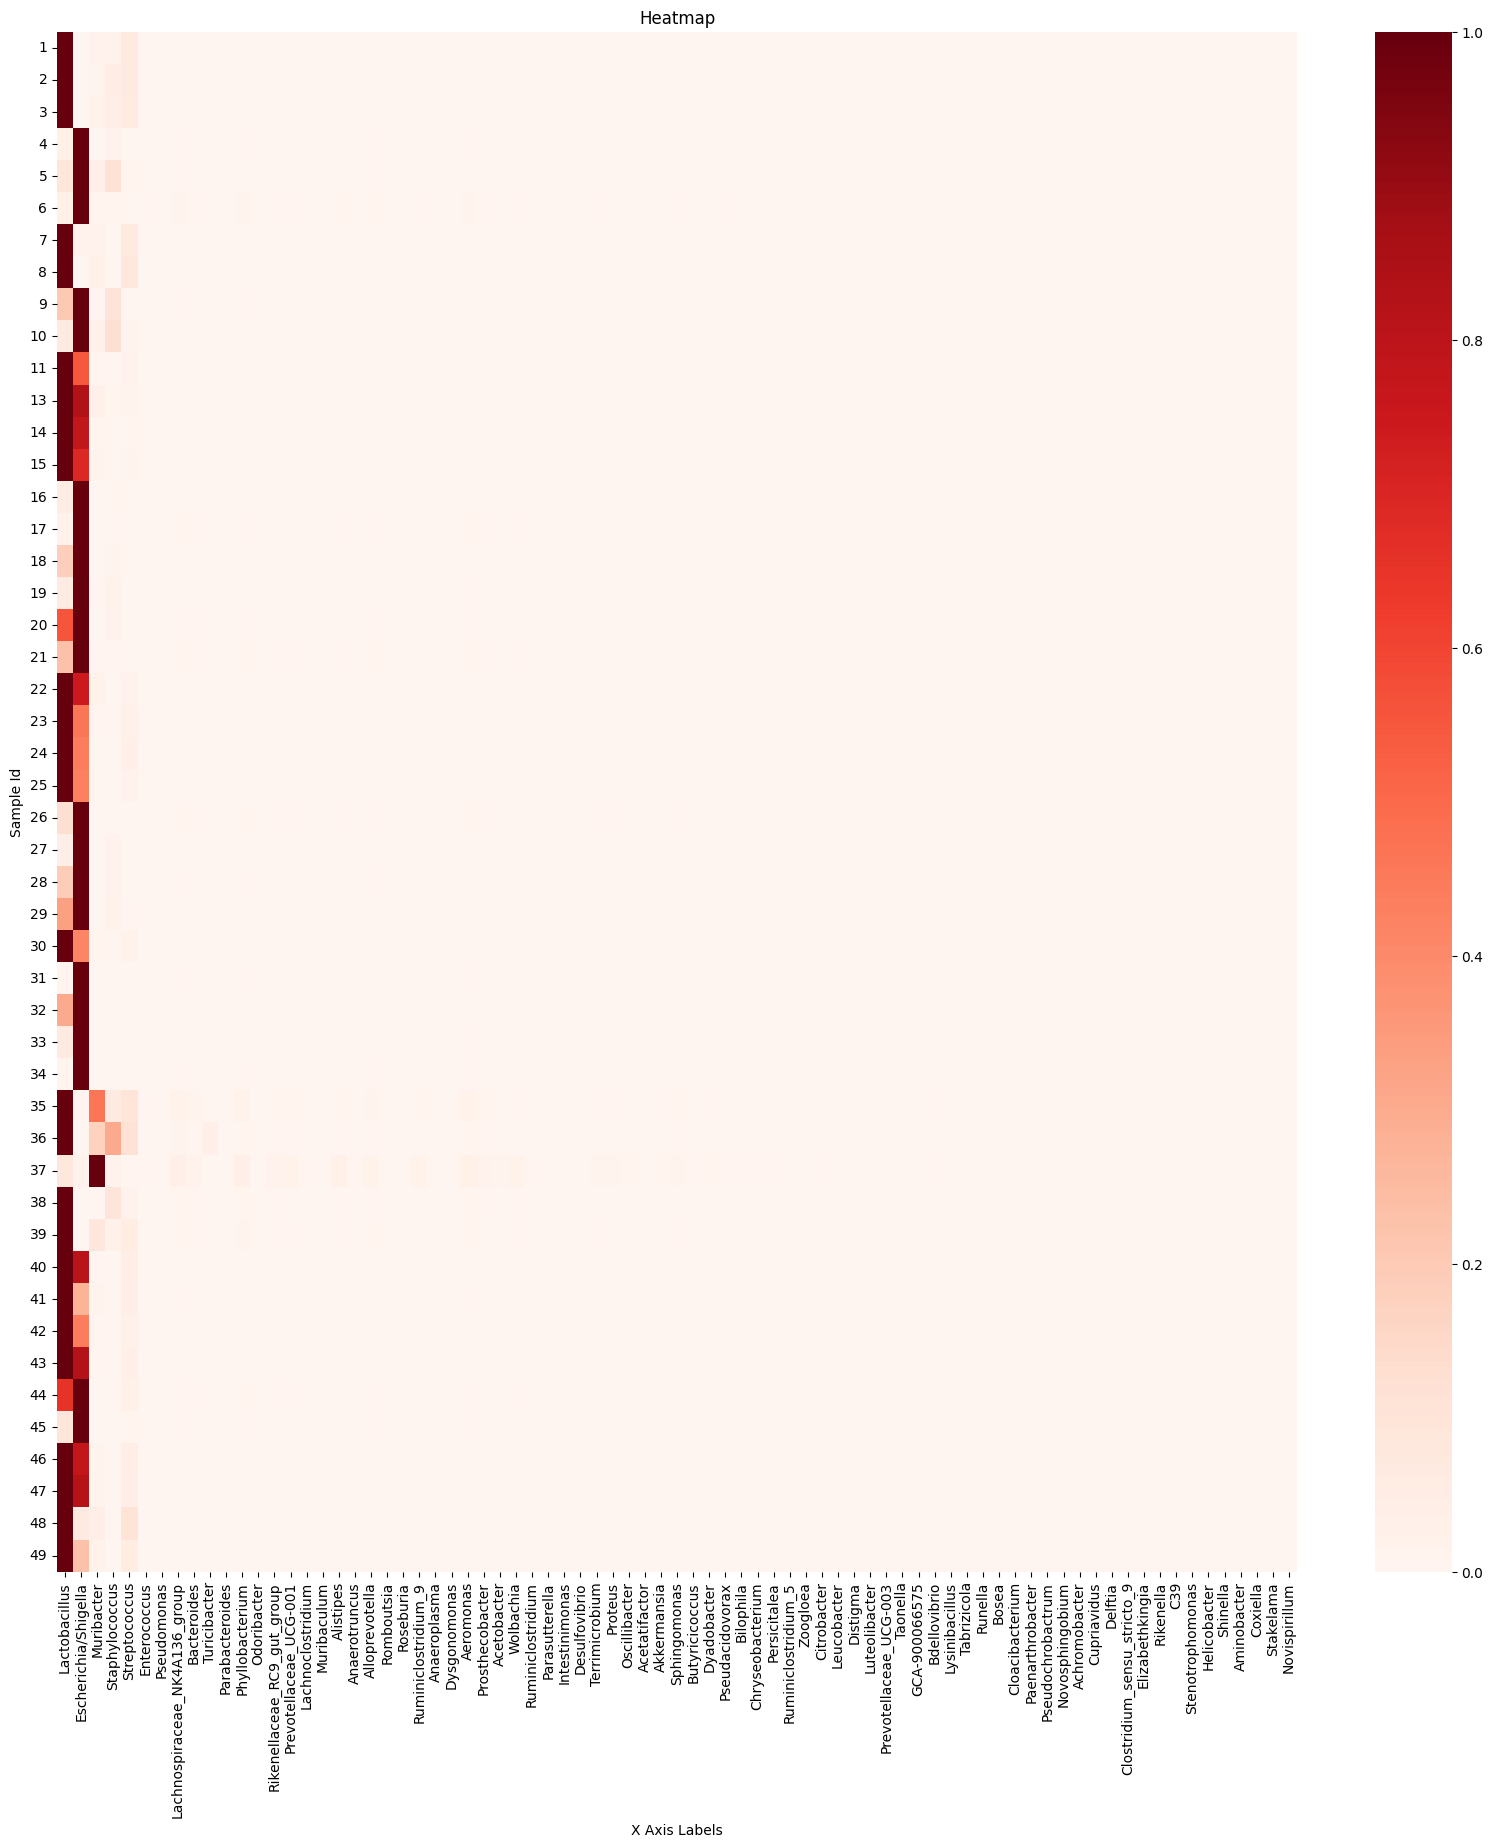

In [ ]:
# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(merged_data, cmap='Reds',yticklabels=y_labels)
# Set title and labels
plt.title("Heatmap")
plt.xticks(rotation=90) 
plt.yticks(rotation=0)   
plt.xlabel("X Axis Labels")
plt.ylabel("Sample Id")

In [ ]:

data = pd.read_csv('genus_table_Umar_MPD.csv')
metadata = pd.read_csv('P8_C_F.csv')
# data = data[(data != 0).sum(axis=1) >= data.shape[1] / 2]
label_mapping = dict(zip(metadata['#NAME'], metadata['Experiment']))
data_colunms = data.columns[1:]
new_columns = []
for column_name in data_colunms:
    str_column_name = int(column_name)
    if str_column_name in label_mapping:
        new_columns.append(label_mapping[str_column_name])
    else:
        new_columns.append(str_column_name)
data.columns = ['#NAME'] + new_columns
# Extract the feature names and mean decrease accuracy values
df = data.drop("#NAME", axis=1)  # Replace 'target_variable' with the column name of your target variable
split_df = pd.concat([data['#NAME'].str.split(';', expand=True)], axis=1)
split_df.columns = ['Column_1', 'Column_2', 'Column_3','Column_4', 'Column_5','Column_6']
columns_to_remove = ['Column_1', 'Column_2', 'Column_3','Column_4', 'Column_5']
data = pd.concat([split_df,df], axis=1)
data = data[data['Column_6'] != 'NA']
data = data.drop(columns=columns_to_remove)
data = data.T
new_columns = data.iloc[0]
data = data[1:]
data.columns = new_columns
data = data.reset_index().rename(columns={"index": "Experiment"})

# Separate the features (X) and the target variable (y)
X = data.drop('Experiment', axis=1)  # Replace 'target_variable' with the column name of your target variable
y = data['Experiment']  # Replace 'target_variable' with the column name of your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=7)
# Train the classifier on the training data
pre = rf.fit(X_train, y_train)
# # Make predictions on the test set
predictions = rf.predict(X_test)

# Print the predicted values
print("Predicted values:", predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

from sklearn.metrics import classification_report

# Calculate precision, recall, and f1-score
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

# Calculate the feature importances (mean decrease accuracy)
feature_importances = rf.feature_importances_
# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=True)
importance_df = importance_df.loc[importance_df['Importance'] > 0]
# Print the feature importances and label names
print("Feature Importances:")
for index, row in importance_df.iterrows():
    label = label_mapping.get(row['Feature'], row['Feature'])
    print(f"{label}: {row['Importance']}")
    


Predicted values: ['F' 'C' 'F' 'F' 'F' 'F' 'C' 'F' 'F' 'F']
Accuracy: 1.0
Confusion Matrix:
[[2 0]
 [0 8]]
Classification Report:
              precision    recall  f1-score   support

           C       1.00      1.00      1.00         2
           F       1.00      1.00      1.00         8

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Feature Importances:
Persicitalea: 0.0012959729346283975
Phyllobacterium: 0.0026692057942057893
Prosthecobacter: 0.006425865800865803
Paenarthrobacter: 0.007711038961038962
Leucobacter: 0.010489993098688753
Staphylococcus: 0.011566558441558444
Oscillibacter: 0.012202083630655072
Papillibacter: 0.012326989619377162
Delftia: 0.013218923933209652
Muribacter: 0.018243466258589133
Ureaplasma: 0.0207612456747405
Bifidobacterium: 0.027767628790646696
Alistipes: 0.03610133708655876
Ruminococcaceae_NK4A214_group: 0.036719233147804585
Taonella: 0.

Heatmap